In [1]:
from glob import glob
import pandas as pd

data_files = glob("../data/raw/*.csv")
data_files.sort()

df_list = []

for file in data_files:
    df = pd.read_csv(file)
    df_list.append(df)

ted_talks = pd.concat(df_list, ignore_index=True)

In [2]:
ted_talks.drop_duplicates("talk_id", inplace=True, ignore_index=True)
ted_talks.sort_values("talk_id", inplace=True, ignore_index=True)
ted_talks.drop("url", axis=1, inplace=True)
ted_talks.drop("available_lang", axis=1, inplace=True)
ted_talks

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,comments,duration,topics,related_talks,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,2,Simple designs to save a life,Amy Smith,{0: 'Amy Smith'},"{0: ['inventor', 'engineer']}","{0: 'Amy Smith designs cheap, practical fixes ...",1724438,2006-02-24,2006-08-15,TED2006,en,101.0,906,"['MacArthur grant', 'alternative energy', 'des...","{1561: 'Energy from floating algae pods', 1072...",Fumes from indoor cooking fires kill more than...,"In terms of invention, I'd like to tell you th..."
2,3,How to rebuild a broken state,Ashraf Ghani,{0: 'Ashraf Ghani'},{0: ['president-elect of afghanistan']},"{0: 'Ashraf Ghani, Afghanistan’s new president...",981920,2005-07-12,2006-10-18,TEDGlobal 2005,en,75.0,1125,"['business', 'corruption', 'culture', 'economi...","{127: 'Want to help Africa? Do business here',...",Ashraf Ghani's passionate and powerful 10-minu...,"A public, Dewey long ago observed, is constitu..."
3,4,The real future of space exploration,Burt Rutan,{0: 'Burt Rutan'},{0: ['aircraft engineer']},"{0: ""In 2004, legendary spacecraft designer Bu...",2427994,2006-02-24,2006-10-25,TED2006,en,196.0,1177,"['NASA', 'aircraft', 'business', 'design', 'en...","{141: ""Inside the world's deepest caves"", 264:...","In this passionate talk, legendary spacecraft ...","I want to start off by saying, Houston, we hav..."
4,5,Great cars are great art,Chris Bangle,{0: 'Chris Bangle'},{0: ['car designer']},{0: 'Car design is a ubiquitous but often over...,978483,2002-02-02,2007-04-05,TED2002,en,81.0,1204,"['business', 'cars', 'design', 'industrial des...","{4: 'The real future of space exploration', 26...",American designer Chris Bangle explains his ph...,"What I want to talk about is, as background, i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,62707,The wildly complex anatomy of a sneaker,Angel Chang,{0: 'Angel Chang'},NaN,{0: 'Angel Chang is a womenswear designer work...,219171,2020-04-23,2020-04-23,TED-Ed,en,NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,"Australians call them ""runners."" The British k...","Australians call them “runners."" The British k..."
4008,62748,A global pandemic calls for global solutions,Larry Brilliant,"{0: 'Larry Brilliant', 1: 'Chris Anderson'}","{0: ['epidemiologist', 'philanthropist'], 1: [...","{0: ""TED Prize winner Larry Brilliant has spen...",760969,2020-04-22,2020-04-24,TED2020: The Prequel,en,37.0,941,"['coronavirus', 'pandemic', 'epidemiology', 'v...","{58: 'My wish: Help me stop pandemics', 61303:...",Examining the facts and figures of the coronav...,"Helen Walters: So, Chris, who's up first? Chri..."
4009,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4010,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."


In [3]:
ted_talks.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
comments          float64
duration            int64
topics             object
related_talks      object
description        object
transcript         object
dtype: object

In [4]:
ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       526
about_speakers    506
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
comments          661
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64

In [5]:
ted_talks[ted_talks.all_speakers.isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,comments,duration,topics,related_talks,description,transcript
2974,23418,How prefab homes can transform affordable housing,Antón García-Abril,NaN,NaN,NaN,14934,2016-11-19,2018-09-04,TEDxYouth@Beaconstreet,en,NaN,449,"['design', 'architecture', 'industrial design'...","{1015: 'Creative houses from reclaimed stuff',...",When architect Antón García-Abril moved to Bos...,Subtitle Provided by JUFE MOOC Studio M Subtit...
3461,36384,Why we need to stop obsessing over World War II,Keith Lowe,NaN,NaN,NaN,103682,2014-11-15,2019-03-01,TEDxAthens,en,NaN,1109,"['war', 'history', 'society', 'future', 'globa...","{1999: 'Why veterans miss war', 1651: 'What I ...",Why are we so obsessed with World War II? Hist...,Hello everybody. Audience: Hello. Keith Lowe: ...
3478,36844,Why talent carries you further than fame,Maisie Williams,NaN,NaN,NaN,3677746,2019-02-03,2019-03-11,TEDxManchester,en,NaN,982,"['art', 'entertainment', 'entrepreneur', 'tech...",{39192: 'Why medieval politics was nothing lik...,You'd never know from her transformation into ...,Hi. I'm Maisie Williams. And I'm kind of just ...
3724,49223,Are we living in a simulation?,Zohreh Davoudi,NaN,NaN,NaN,485122,2019-10-08,2019-10-08,TED-Ed,en,NaN,249,"['TED-Ed', 'animation', 'education', 'technolo...","{26263: 'Does time exist?', 24106: 'How do you...","All life on Earth— living and inanimate, micro...","We live in a vast universe, on a small wet pla..."


In [6]:
import ast

def to_dict(x):
    if pd.isna(x):
        return x
    return ast.literal_eval(x)

In [7]:
new = ted_talks["all_speakers"].apply(to_dict)

In [8]:
nb_speakers = new.apply(lambda x: len(x) if pd.notnull(x) else x)
nb_speakers

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4007    1.0
4008    2.0
4009    1.0
4010    1.0
4011    1.0
Name: all_speakers, Length: 4012, dtype: float64

In [9]:
nb_speakers[nb_speakers == max(nb_speakers)]

2495    5.0
Name: all_speakers, dtype: float64

In [10]:
ted_talks.speaker_1.value_counts().head(20)

Alex Gendler           34
Iseult Gillespie       19
Emma Bryce             12
Daniel Finkel          11
Hans Rosling           10
Alex Rosenthal         10
Greg Gage               9
Juan Enriquez           9
Chris Anderson          8
Dan Ariely              7
Marco Tempest           7
Bill Gates              6
Joy Lin                 6
Elizabeth Cox           6
 Rives                  6
Stewart Brand           6
A.J. Jacobs             5
Nicholas Negroponte     5
Mia Nacamulli           5
Clay Shirky             5
Name: speaker_1, dtype: int64

In [11]:
ted_talks.native_lang.value_counts()

en       3962
es         28
fr         10
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

In [12]:
ted_talks.native_lang.value_counts() / len(ted_talks) * 100

en       98.753739
es        0.697906
fr        0.249252
ja        0.074776
hi        0.049850
de        0.024925
pt        0.024925
ko        0.024925
zh-cn     0.024925
ar        0.024925
pt-br     0.024925
it        0.024925
Name: native_lang, dtype: float64

In [13]:
df = pd.read_csv("../data/raw/ted_talks_en.csv")
df[df.native_lang == "es"]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
1846,2163,Poetry that frees the soul,Cristina Domenech,{0: 'Cristina Domenech'},{0: ['poet and educator']},{0: 'Cristina Domenech proposes to use languag...,783294,2014-10-01,2015-01-16,TEDxRiodelaPlata,es,"['ar', 'de', 'el', 'en', 'es', 'fa', 'fr', 'he...",50.0,757,"['TEDx', 'creativity', 'crime', 'language', 'p...","{2013: 'Why people need poetry', 1286: 'Philos...",https://www.ted.com/talks/cristina_domenech_po...,"""It's said that to be a poet, you have to go t...",It's said that to be a poet you have to go to ...
1871,2185,The power of herd immunity,Romina Libster,{0: 'Romina Libster'},{0: ['medical researcher']},{0: 'Dr. Romina Libster investigates influenza...,760641,2014-11-20,2015-02-25,TEDxRiodelaPlata,es,"['ar', 'de', 'el', 'en', 'es', 'fr', 'he', 'hu...",120.0,881,"['health', 'health care', 'illness', 'medicine...","{869: 'HIV and flu -- the vaccine strategy', 1...",https://www.ted.com/talks/romina_libster_the_p...,How do vaccines prevent disease -- even among ...,One of the first patients I had to see as a pe...
1900,2186,Math is forever,Eduardo Sáenz de Cabezón,{0: 'Eduardo Sáenz de Cabezón'},{0: ['math educator']},{0: 'Eduardo Sáenz de Cabezón links science wi...,1899294,2014-10-01,2015-04-07,TEDxRiodelaPlata,es,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'hr...",120.0,581,"['TEDx', 'humor', 'math', 'TED en Español', 's...",{1811: 'Why I fell in love with monster prime ...,https://www.ted.com/talks/eduardo_saenz_de_cab...,"With humor and charm, mathematician Eduardo Sá...","Imagine you're in a bar, or a club, and you st..."
2210,2568,How Argentina's blind soccer team became champ...,Gonzalo Vilariño,{0: 'Gonzalo Vilariño'},"{0: ['lawyer', 'coach']}",{0: 'Gonzalo Vilariño uses sport to change the...,546103,2015-09-24,2016-08-19,TEDxRiodelaPlata,es,"['ar', 'el', 'en', 'es', 'fr', 'he', 'it', 'ko...",16.0,859,"['collaboration', 'disability', 'community', '...","{2186: 'Math is forever', 769: 'The opportunit...",https://www.ted.com/talks/gonzalo_vilarino_how...,"With warmth and respect, Gonzalo Vilariño tell...",I opened a blind man's head. I didn't make him...
2353,2692,Should we simplify spelling?,Karina Galperin,{0: 'Karina Galperin'},{0: ['literary scholar']},"{0: 'Karina Galperin studies the culture, lang...",596047,2015-09-24,2017-03-16,TEDxRiodelaPlata,es,"['ar', 'bg', 'el', 'en', 'es', 'fr', 'he', 'it...",74.0,973,"['children', 'education', 'communication', 'in...","{2479: ""The nit-picking glory of The New Yorke...",https://www.ted.com/talks/karina_galperin_shou...,How much energy and brain power do we devote t...,We lost a lot of time at school learning spell...
2368,2725,The conversation we're not having about digita...,Sebastián Bortnik,{0: 'Sebastián Bortnik'},{0: ['information security specialist']},"{0: ""Sebastián Bortnik's work is focused on pr...",523867,2016-10-22,2017-04-05,TEDxRiodelaPlata,es,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'hr', 'ko...",22.0,825,"['activism', 'children', 'communication', 'fam...",{2666: 'How online abuse of women has spiraled...,https://www.ted.com/talks/sebastian_bortnik_th...,We need to talk to kids about the risks they f...,[This talk contains graphic content. Viewer di...
2393,2777,"Poetry, music and identity",Jorge Drexler,{0: 'Jorge Drexler'},"{0: ['musician', 'poet']}",{0: 'Jorge Drexler is a musician and the first...,1472166,2017-04-24,2017-05-10,TED2017,es,"['ar', 'en', 'es', 'fr', 'he', 'ko', 'nl', 'pt...",28.0,1000,"['composing', 'creativity', 'entertainment', '...","{2186: 'Math is forever', 2684: 'An electrifyi...",https://www.ted.com/talks/jorge_drexler_poetry...,"One night in 2002, a friend gave Jorge Drexler...",I'm going to tell you the story of a song. I w...
2414,2740,"To understand autism, don't look away",Carina Morillo,{0: 'Carina Morillo'},{0: ['autism a

In [14]:
import ast

ast.literal_eval(ted_talks.all_speakers.iloc[0])

{0: 'Al Gore'}

In [15]:
ted_talks.occupations.iloc[0]

"{0: ['climate advocate']}"

In [16]:
occup = ted_talks.occupations.apply(lambda x: to_dict(x)[0] if pd.notnull(x) else ["unknown"])
occup

0                     [climate advocate]
1                   [inventor, engineer]
2       [president-elect of afghanistan]
3                    [aircraft engineer]
4                         [car designer]
                      ...               
4007                           [unknown]
4008    [epidemiologist, philanthropist]
4009                           [unknown]
4010                           [unknown]
4011                           [unknown]
Name: occupations, Length: 4012, dtype: object

In [17]:
about = ted_talks.about_speakers.apply(lambda x: to_dict(x)[0] if pd.notnull(x) else "unknown")
about

0       Nobel Laureate Al Gore focused the world’s att...
1       Amy Smith designs cheap, practical fixes for t...
2       Ashraf Ghani, Afghanistan’s new president-elec...
3       In 2004, legendary spacecraft designer Burt Ru...
4       Car design is a ubiquitous but often overlooke...
                              ...                        
4007    Angel Chang is a womenswear designer working w...
4008    TED Prize winner Larry Brilliant has spent his...
4009                                              unknown
4010                                              unknown
4011                                              unknown
Name: about_speakers, Length: 4012, dtype: object

In [18]:
list(ted_talks[ted_talks.native_lang == "it"].transcript)

['[His Holiness Pope Francis Filmed in Vatican City First shown at TED2017] Good evening – or, good morning, I am not sure what time it is there. Regardless of the hour, I am thrilled to be participating in your conference. I very much like its title – "The Future You" – because, while looking at tomorrow, it invites us to open a dialogue today, to look at the future through a "you." "The Future You:" the future is made of yous, it is made of encounters, because life flows through our relations with others. Quite a few years of life have strengthened my conviction that each and everyone\'s existence is deeply tied to that of others: life is not time merely passing by, life is about interactions. As I meet, or lend an ear to those who are sick, to the migrants who face terrible hardships in search of a brighter future, to prison inmates who carry a hell of pain inside their hearts, and to those, many of them young, who cannot find a job, I often find myself wondering: "Why them and not 

In [19]:
ted_talks[ted_talks.recorded_date.isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,comments,duration,topics,related_talks,description,transcript
3877,56629,The unpaid work that GDP ignores -- and why it...,Marilyn Waring,{0: 'Marilyn Waring'},{0: ['economist']},{0: 'Marilyn Waring advocates for a public pol...,1276272,NaN,2020-01-23,TEDxChristchurch,en,20.0,1039,"['global development', 'development', 'social ...",{46582: 'Why governments should prioritize wel...,"If you: do laundry, are (or have been) pregnan...",(In Maori: My mountain is Taupiri.) (Waikato i...


In [20]:
ted_talks.apply(lambda x: x.recorded_date if pd.notnull(x.recorded_date) else x.published_date, axis=1)

0       2006-02-25
1       2006-02-24
2       2005-07-12
3       2006-02-24
4       2002-02-02
           ...    
4007    2020-04-23
4008    2020-04-22
4009    2020-04-27
4010    2020-04-28
4011    2020-04-30
Length: 4012, dtype: object

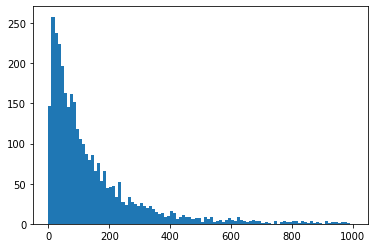

In [21]:
import matplotlib.pyplot as plt

plt.hist(ted_talks.comments, bins=100, range=[0, 1000])
plt.show()

In [22]:
ted_talks[ted_talks.comments == 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,comments,duration,topics,related_talks,description,transcript
3905,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,..."
3926,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...


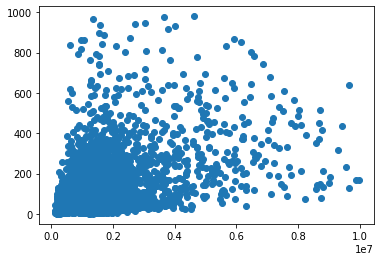

In [23]:
plt.scatter(ted_talks.views[(ted_talks.views < 1e7) & (ted_talks.comments < 1e3)], ted_talks.comments[(ted_talks.views < 1e7)  & (ted_talks.comments < 1e3)])
plt.show()

In [24]:
ted_talks[ted_talks.comments.isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,comments,duration,topics,related_talks,description,transcript
1066,1323,"""Women of Hope""",Morley,{0: ' Morley'},{0: ['singer-songwriter']},"{0: 'Recording artist, singer, and composer Mo...",365088,2011-12-01,2012-01-13,TEDxWomen 2011,en,NaN,330,"['TEDx', 'activism', 'music', 'poetry', 'women...","{823: 'Singing old poems to life', 1068: 'Poem...","Inspired by Aung San Suu Kyi's call to action,...",(Music) ♫ They stood together ♫ ♫ under a tree...
1739,2041,"Want to innovate? Become a ""now-ist""",Joi Ito,{0: 'Joi Ito'},{0: ['relentless mind']},{0: 'Joi Ito is the former director of the MIT...,2314973,2014-03-14,2014-07-07,TED2014,en,NaN,751,"['creativity', 'innovation', 'investment', 'sc...","{63: 'The era of open innovation', 1065: 'We a...","""Remember before the internet?"" asks Joi Ito. ...","On March 10, 2011, I was in Cambridge at the M..."
2308,2657,Why do cats act so weird?,Tony Buffington,{0: 'Tony Buffington'},NaN,NaN,8302549,2016-04-26,2017-09-07,TED-Ed,en,NaN,282,"['TED-Ed', 'animals', 'science', 'biology', 'n...",{30507: 'The history of the world according to...,"They're cute, they're lovable, and judging by ...","Why do cats do that? They're cute, they're lov..."
2391,2745,What makes a hero?,Matthew Winkler,{0: 'Matthew Winkler'},NaN,NaN,6349092,2012-12-04,2017-09-07,TED-Ed,en,NaN,261,"['TED-Ed', 'storytelling', 'literature', 'pers...","{17848: ""The Irish myth of the Giant's Causewa...",What trials unite not only Harry Potter or Fro...,"What do Harry Potter, Katniss Everdeen, and Fr..."
2392,2746,The science of stage fright (and how to overco...,Mikael Cho,{0: 'Mikael Cho'},NaN,NaN,1132807,2013-10-08,2017-09-07,TED-Ed,en,NaN,233,"['TED-Ed', 'entertainment', 'fear', 'performan...",{24447: 'How to practice effectively...for jus...,"Heart racing, palms sweating, labored breathin...","Palms sweaty, heart racing, stomach in knots. ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,62554,What's the point(e) of ballet?,Ming Luke,{0: 'Ming Luke'},NaN,NaN,190644,2020-04-20,2020-04-20,TED-Ed,en,NaN,279,"['TED-Ed', 'education', 'animation', 'dance', ...","{2763: 'The physics of the ""hardest move"" in b...",A baby cursed at birth. A fierce battle of goo...,A baby cursed at birth. A fierce battle of goo...
4007,62707,The wildly complex anatomy of a sneaker,Angel Chang,{0: 'Angel Chang'},NaN,{0: 'Angel Chang is a womenswear designer work...,219171,2020-04-23,2020-04-23,TED-Ed,en,NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,"Australians call them ""runners."" The British k...","Australians call them “runners."" The British k..."
4009,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4010,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."


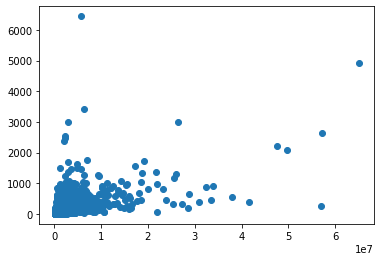

In [25]:
plt.scatter(ted_talks.views, ted_talks.comments)
plt.show()

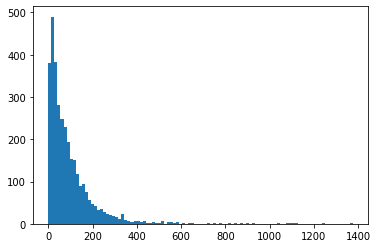

In [26]:
plt.hist(ted_talks.comments / ted_talks.views * 1e6, bins=100)
plt.show()

In [27]:
(ted_talks.comments / ted_talks.views * 1e6).median()

62.48241041387509

In [28]:
rate = (ted_talks.comments / ted_talks.views).median()

In [29]:
ted_talks.apply(lambda x: int(x.comments) if pd.notnull(x.comments) else int(rate * x.views), axis=1)

0       272
1       101
2        75
3       196
4        81
       ... 
4007     13
4008     37
4009     19
4010      3
4011      0
Length: 4012, dtype: int64

In [30]:
ted_talks.comments

0       272.0
1       101.0
2        75.0
3       196.0
4        81.0
        ...  
4007      NaN
4008     37.0
4009      NaN
4010      NaN
4011      NaN
Name: comments, Length: 4012, dtype: float64

In [31]:
ast.literal_eval(list(ted_talks[ted_talks.talk_id == 243].related_talks)[0]).keys()

dict_keys([128, 192, 74, 1380, 535, 2784])

In [32]:
ted_talks.related_talks.apply(lambda x: to_dict(x).keys())

0            (243, 547, 2093, 54715, 29968, 2339)
1              (1561, 1072, 1184, 1406, 767, 285)
2                (127, 1929, 584, 270, 152, 1321)
3                 (141, 264, 335, 1402, 429, 292)
4                  (4, 266, 27, 1506, 1724, 1109)
                          ...                    
4007     (2756, 21895, 24724, 10193, 13000, 2371)
4008        (58, 61303, 62149, 60084, 2185, 2317)
4009    (35386, 24542, 59154, 2243, 24465, 58212)
4010      (20973, 36408, 31780, 2219, 4873, 2451)
4011    (62347, 29159, 45539, 17733, 1011, 41226)
Name: related_talks, Length: 4012, dtype: object

In [33]:
ted_talks.corr()

,talk_id,views,comments,duration
talk_id,1.000000,-0.113339,-0.233076,-0.260835
views,-0.113339,1.000000,0.500758,0.072676
comments,-0.233076,0.500758,1.000000,0.175175
duration,-0.260835,0.072676,0.175175,1.000000


In [34]:
ted_talks[ted_talks.views == 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,comments,duration,topics,related_talks,description,transcript
2629,7150,Hablemos de la muerte con los niños,Alejandro Nespral,{0: 'Alejandro Nespral'},NaN,"{0: 'Nacido en Salta, vivió 30 años en Buenos ...",0,2017-09-23,2017-12-12,TEDxBariloche,es,NaN,908,"['TED en Español', 'death', 'children', 'youth...","{2565: 'What we can do to die well', 9982: 'Wh...","Esta charla es de un evento TEDx, organizado d...",¿Les pasó cuando eran chicos que alguien que c...
2842,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3336,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3352,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...","Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3598,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3863,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...","Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
3985,61551,Et si la bière était féminine ?,Elisabeth Pierre,{0: 'Elisabeth Pierre'},{0: ['zythologist']},{0: 'Elisabeth is a Zythologist'},0,2014-05-24,2020-03-28,TEDxToulouse,fr,NaN,1135,"['history', 'women', 'innovation', 'food', 'so...","{204: 'Tales of passion', 2706: 'Why women sho...",Cette présentation a été faite lors d'un événe...,C'est la première sortie de mes années collège...
4011,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [35]:
ted_talks.event.value_counts()

TED-Ed                  559
TED2017                  96
TED2018                  96
TED2019                  91
TED2014                  84
                       ... 
TEDxGroningen             1
TEDxSiliconValley         1
TEDxAmoskeagMillyard      1
TEDxUM                    1
TEDxUMKC                  1
Name: event, Length: 461, dtype: int64

In [36]:
df = pd.read_csv("../data/ted_talks_prepro.csv")

In [37]:
df.dtypes

talk_id            int64
title             object
speaker           object
occupations       object
about_speaker     object
views              int64
recorded_date     object
published_date    object
event             object
comments           int64
duration           int64
topics            object
related_talks     object
description       object
transcript        object
dtype: object